In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train[0].shape

(28, 28)

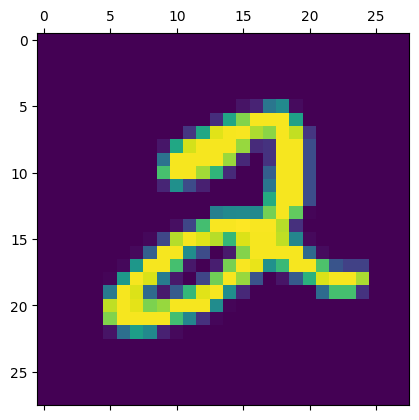

In [4]:
plt.matshow(X_train[5])

In [5]:
# Scaling the features to get a higher accuracy
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# Reshaping the 28*28 2D Array into 1D Array
X_train_flattened = X_train.reshape(len(X_train) , 28*28)

In [7]:
X_train_flattened.shape

(60000, 784)

In [8]:
X_test_flattened = X_test.reshape(len(X_test) , 28*28)

In [9]:
X_test_flattened.shape

(10000, 784)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape = (784,) , activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened , y_train , epochs = 5)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 720us/step - accuracy: 0.8129 - loss: 0.7283
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.9143 - loss: 0.3077
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9208 - loss: 0.2839
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.9243 - loss: 0.2754
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.9261 - loss: 0.2668


In [11]:
model.evaluate(X_test_flattened , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.9152 - loss: 0.3047


[0.2685316801071167, 0.9258999824523926]

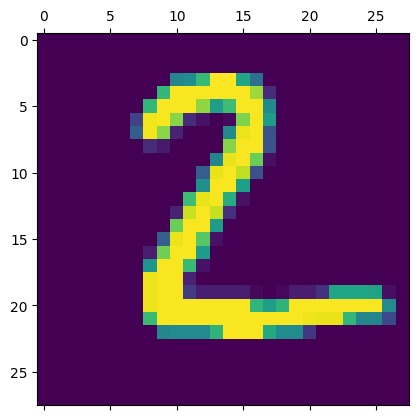

In [12]:
plt.matshow(X_test[1])

In [13]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step


array([2.74508037e-02, 4.99593341e-07, 4.40882035e-02, 9.58983541e-01,
       2.56561744e-03, 1.23521574e-01, 1.32878893e-06, 9.99871016e-01,
       8.64689499e-02, 5.93421102e-01], dtype=float32)

In [14]:
np.argmax(y_predicted[0])

np.int64(7)

In [15]:
# New array from existing array
y_predicted_lable = [np.argmax(i) for i in y_predicted]

In [16]:
y_predicted_lable[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [17]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [18]:
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_lable)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   7,   10,  925,   14,    8,    5,   12,   12,   37,    2],
       [   1,    0,   21,  917,    0,   30,    2,   11,   21,    7],
       [   1,    1,    5,    2,  913,    0,   12,    6,   10,   32],
       [   8,    3,    3,   29,    8,  784,   15,    7,   29,    6],
       [  13,    3,    7,    1,    7,   11,  912,    2,    2,    0],
       [   1,    8,   21,    7,    5,    0,    0,  965,    2,   19],
       [   9,   10,    8,   22,    9,   32,   10,   13,  855,    6],
       [  11,    7,    1,   10,   26,    8,    0,   34,    4,  908]],
      dtype=int32)>

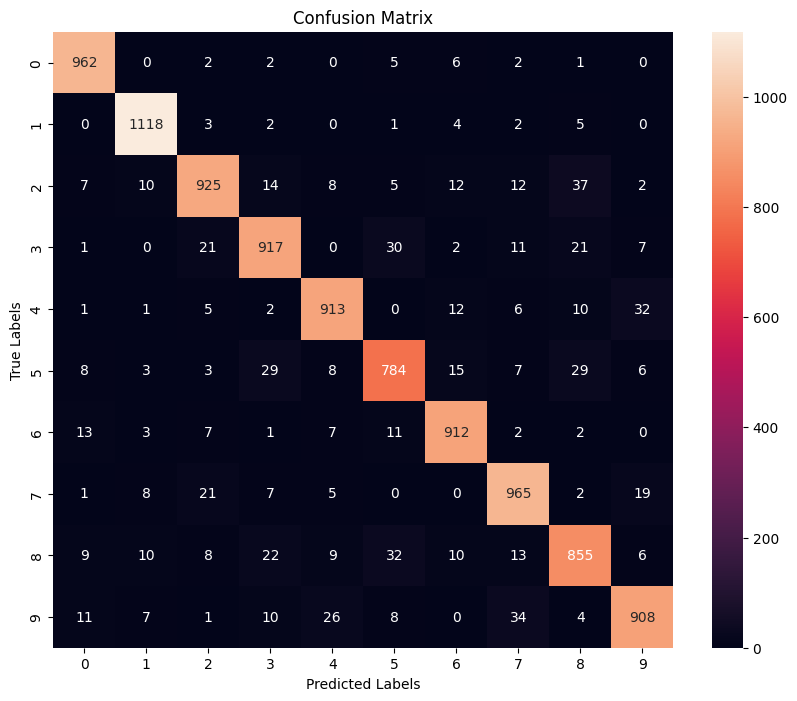

In [19]:
import seaborn as sns
# Assuming 'cm' is your NumPy confusion matrix

plt.figure(figsize=(10, 8))
sns.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
model2 = keras.Sequential([
    keras.layers.Dense(100 , input_shape = (784,) , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'sigmoid')
])

model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model2.fit(X_train_flattened , y_train , epochs = 5)

Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8753 - loss: 0.4530  
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9623 - loss: 0.1306
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.9739 - loss: 0.0878
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9799 - loss: 0.0658   
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9844 - loss: 0.0502


In [21]:
# just a calculation 
# remember np.argmax will return the index of the maximum value in an array

myarray = [10 , 55 , 4 , 86 , 1 , 45]
myarray[np.argmax(myarray)]


86

In [23]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28 , 28)),
    keras.layers.Dense(100 , input_shape = (784,) , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model2.fit(X_train , y_train , epochs = 5 , callbacks = [tb_callback])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8789 - loss: 0.4432
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9625 - loss: 0.1293
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9739 - loss: 0.0857
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9794 - loss: 0.0654
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9858 - loss: 0.0479


In [24]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [ ]:
model2.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.9719 - loss: 0.0990


[0.08509200066328049, 0.9757000207901001]

In [ ]:
#some matrix exercises
import numpy as np
a1 = np.array([[200 , 220 , 250] , [68 , 79 , 105] , [110 , 140 , 180] , [80 , 85 , 90]])
a2 = np.array([75])

output = a1 * a2
output

array([[15000, 16500, 18750],
       [ 5100,  5925,  7875],
       [ 8250, 10500, 13500],
       [ 6000,  6375,  6750]])

In [26]:
tf.test.gpu_device_name()

''